# Deeper analysis of the data
The data is split into 10 classes, search for important attributes for each class.
or each **`train_smpl_<label>`** file, record the first 10 pixels, in order of the absolute
correlation value, for each street sign.

# Averaged by Column

In [94]:
from Scripts import helperfn as hf

X, y = hf.get_data(0)

from Scripts import pixelFinder as pf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Scripts import downsample
%load_ext autoreload
%autoreload 2

downscaledX = downsample.downscale(X)

combined = hf.append_result_col(pd.DataFrame(X), y)
combinedDownscaled = hf.append_result_col(pd.DataFrame(downscaledX), y)

# --- SPLITTING INTO LABELS OF 1 AND 0 ---
# LABEL 0 - 210 VALUES
# LABEL 1 - 9480 VALUES

zeroLabel = []
zeroLabelDownscaled = []

for i in range(len(combined)):
    if combined.at[i, 'y'] == 0:
        zeroLabel.append(combined.loc[[i]])
        
    # elif combined.at[i, 'y'] == 1:
    #     oneLabel.append(combined.loc[[i]])

for i in range(len(combinedDownscaled)):
    if combinedDownscaled.at[i, 'y'] == 0:
        zeroLabelDownscaled.append(combinedDownscaled.loc[[i]])

# Turning the list back into a DF
zeroDataframe = pd.DataFrame(pd.concat(zeroLabel))
zeroDataframeDownscaled = pd.DataFrame(pd.concat(zeroLabelDownscaled))
     
# --- FINDING AVERAGE GREYSCALE VALUE FOR EACH COLUMN ---
ColumnGetAverageGS = zeroDataframe.mean(axis=0)
ColumnGetAverageGSDownscaled = zeroDataframeDownscaled.mean(axis=0)

        # --- Dropping the y column ---
ColumnAverageGreyscale = ColumnGetAverageGS.drop(labels=['y'])
ColumnAverageGreyscaleDownscaled = ColumnGetAverageGSDownscaled.drop(labels=['y'])

# --- FINDING AVERAGE GREYSCALE VALUE FOR EACH ROW ---
RowAverageGreyscale = zeroDataframe.mean(axis = 1)
RowAverageGreyscaleDownscaled = zeroDataframeDownscaled.mean(axis = 1)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
         0      1      2      3      4      5      6      7      8      9  \
0     78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1     73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2     72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3     67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4     74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
205  113.0  113.0  109.0  107.0  106.0  110.0  121.0  119.0  115.0  112.0   
206  115.0   84.0   83.0   80.0   68.0   68.0   77.0   76.0   70.0   65.0   
207   98.0   81.0   82.0   76.0   81.0   74.0   78.0   79.0   76.0   74.0   
208   68.0   94.0  104.0   75.0   65.0   72.0  138.0  255.0  255.0  255.0   
209  240.0  246.0  250.0  246.0  243.0  243.0  240.0  222.0  205.

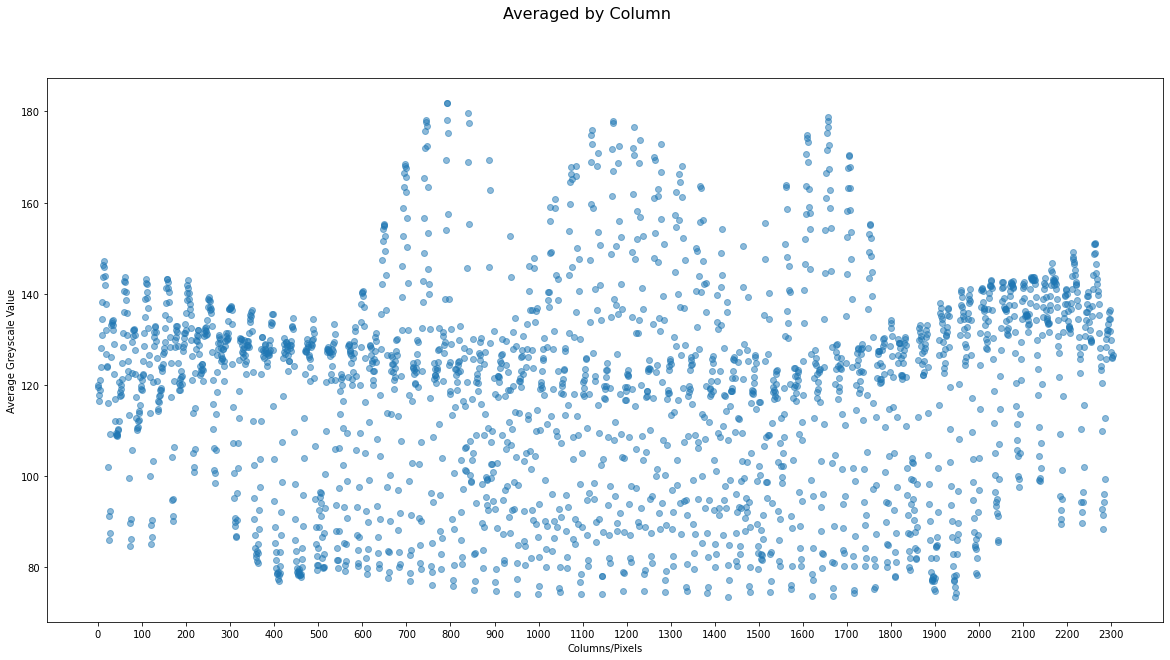

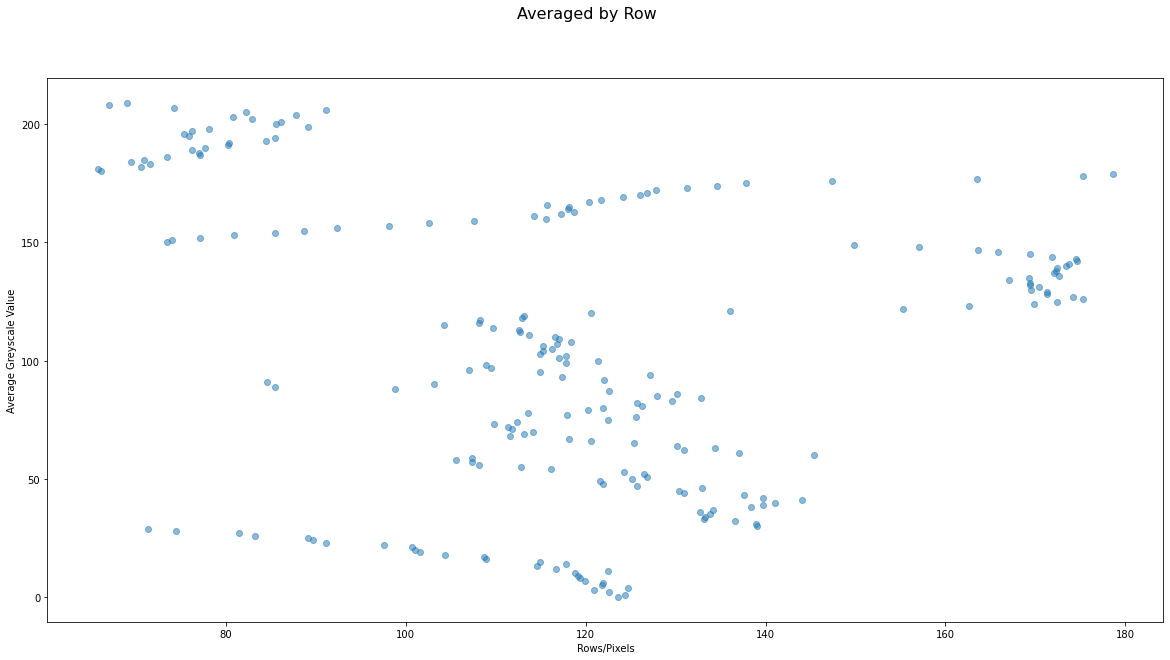

In [90]:
import matplotlib.pyplot as plt

# --- BY COLUMN ---

yValues = ColumnAverageGreyscale      #normal 2k
xValues = ColumnAverageGreyscale.index


fig = plt.figure(figsize= (20,10))
fig.suptitle('Averaged by Column', fontsize =16)
plt.scatter(xValues, yValues , marker='o', alpha = 0.5)
plt.xticks(xValues[::100])
plt.ylabel('Average Greyscale Value')
plt.xlabel('Columns/Pixels')
plt.show()

# --- BY ROW ---

xValues2 = RowAverageGreyscale
yValues2 = RowAverageGreyscale.index

fig = plt.figure(figsize= (20,10))
fig.suptitle('Averaged by Row', fontsize =16)
plt.scatter(xValues2, yValues2 , marker='o', alpha = 0.5)
plt.ylabel('Average Greyscale Value')
plt.xlabel('Rows/Pixels')
plt.show()


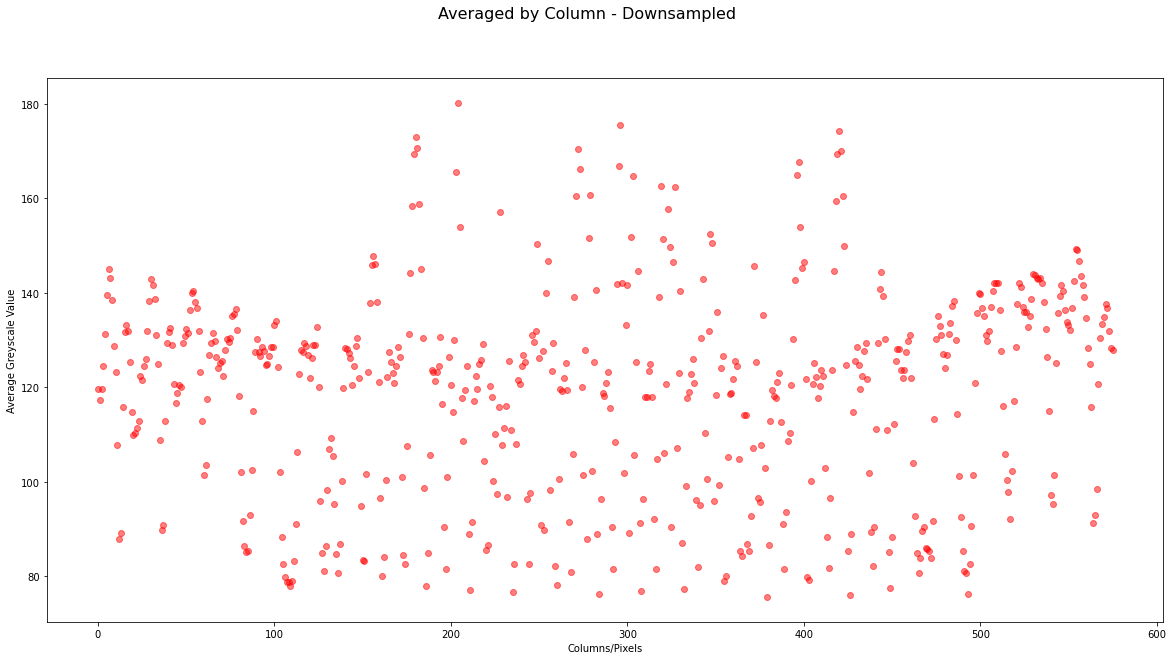

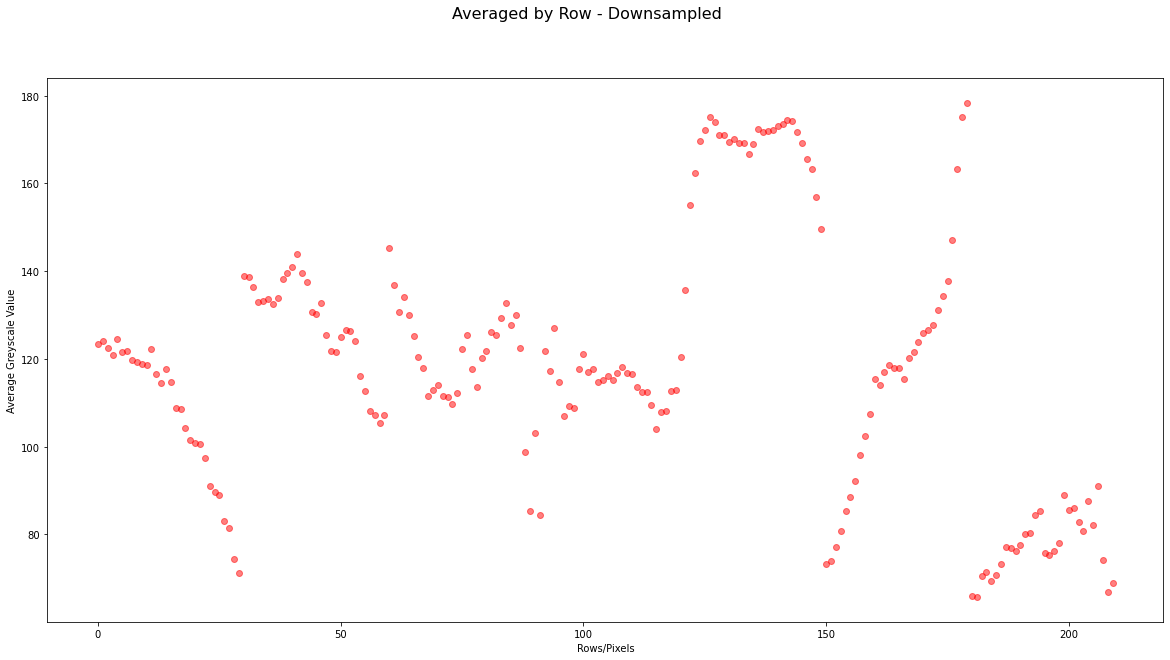

In [91]:
# --- Column Downscaled ---

yValuesDownscaled = ColumnAverageGreyscaleDownscaled
xValuesDownscaled = ColumnAverageGreyscaleDownscaled.index

fig1 = plt.figure(figsize= (20,10))
fig1.suptitle('Averaged by Column - Downsampled', fontsize =16)
plt.scatter(xValuesDownscaled, yValuesDownscaled, marker='o', c='r', alpha=0.5)

plt.ylabel('Average Greyscale Value')
plt.xlabel('Columns/Pixels')
plt.show()



# --- Row Downscaled ---

yValuesDownscaled2 = RowAverageGreyscaleDownscaled
xValuesDownscaled2 = RowAverageGreyscaleDownscaled.index

fig1 = plt.figure(figsize= (20,10))
fig1.suptitle('Averaged by Row - Downsampled', fontsize =16)
plt.scatter(xValuesDownscaled2, yValuesDownscaled2, marker='o', c='r', alpha=0.5)
plt.ylabel('Average Greyscale Value')
plt.xlabel('Rows/Pixels')
plt.show()

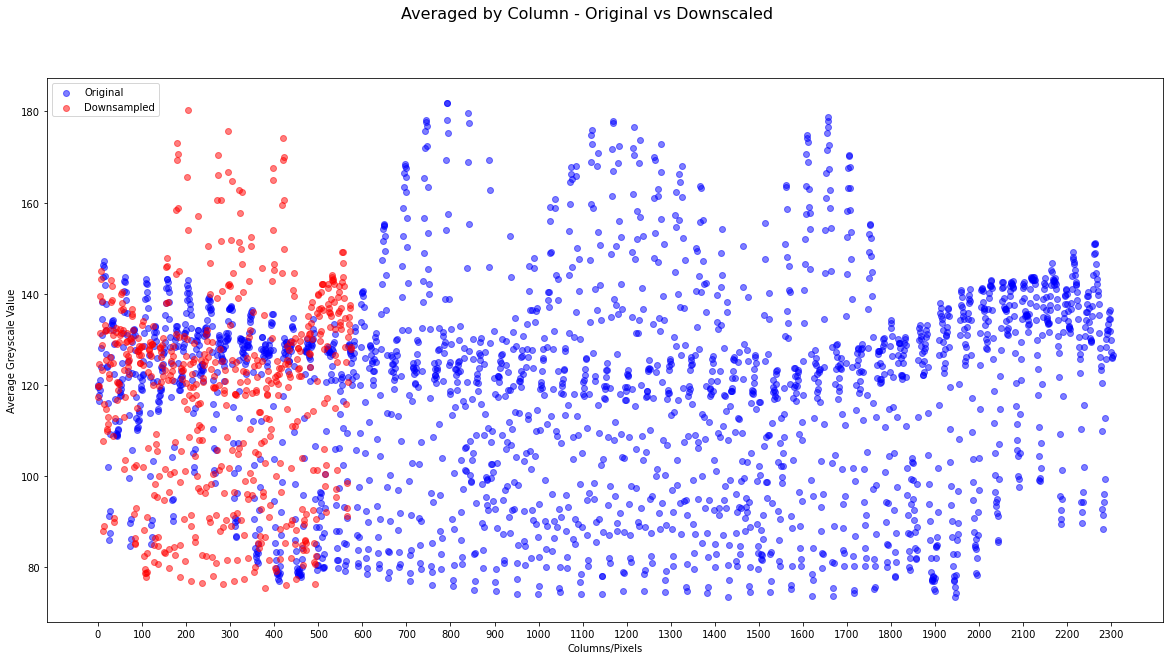

In [92]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Averaged by Column - Original vs Downscaled', fontsize =16)
ax1 = fig.add_subplot(111)

ax1.scatter(xValues, yValues, marker='o', c='b', alpha = 0.5, label='Original')
ax1.scatter(xValuesDownscaled, yValuesDownscaled, marker='o', c='r', alpha=0.5, label='Downsampled')
plt.xticks(xValues[::100])
plt.ylabel('Average Greyscale Value')
plt.xlabel('Columns/Pixels')
plt.legend(loc='upper left')
plt.show()

# Averaged by row

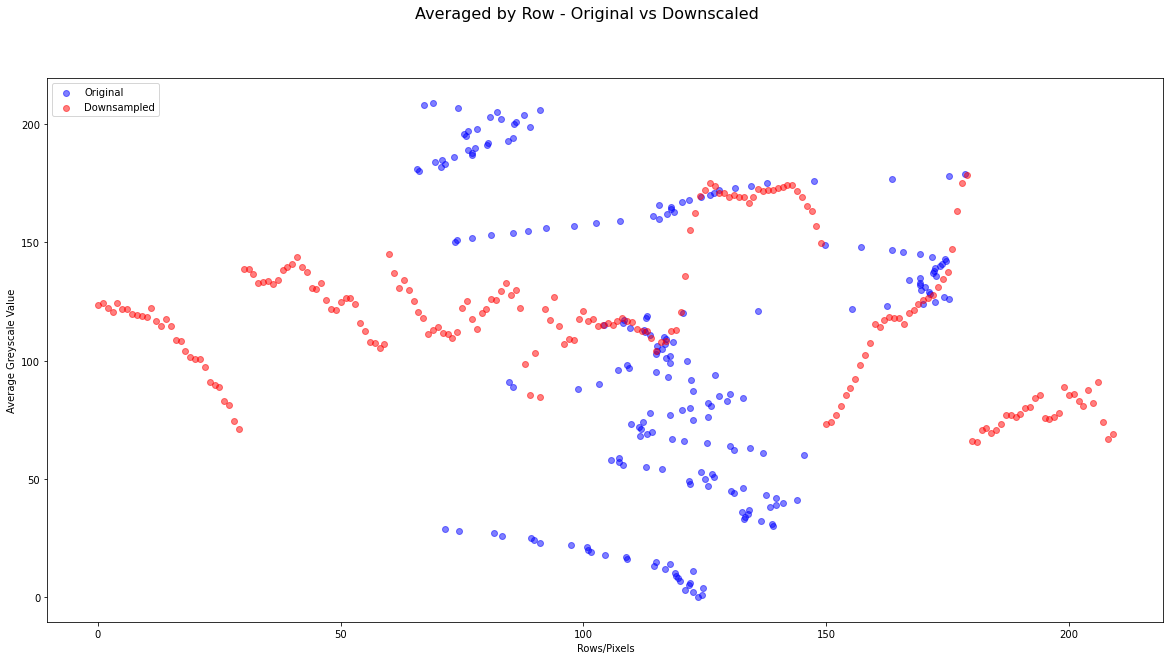

In [93]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Averaged by Row - Original vs Downscaled', fontsize =16)
ax1 = fig.add_subplot(111)

ax1.scatter(xValues2, yValues2, marker='o', c='b', alpha = 0.5, label='Original')
ax1.scatter(xValuesDownscaled2, yValuesDownscaled2, marker='o', c='r', alpha=0.5, label='Downsampled')
plt.ylabel('Average Greyscale Value')
plt.xlabel('Rows/Pixels')
plt.legend(loc='upper left')
plt.show()